#### Álvaro Rull y Salvador Heras
Contactos: alvaro.rull@cunef.edu ;
salvador.heras@cunef.edu

# Bloque 3: modelado

In [1]:
from collections import Counter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from scipy.stats import randint as sp_randint
import scikitplot as skplt
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix, log_loss


from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import PartialDependenceDisplay
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_fraud = pd.read_csv('./data_preprocesada/df_fraud_initial_preprocessing.csv')\
                      .drop('Unnamed: 0', axis=1)
X_train= pd.read_csv("./data_preprocesada/X_train_seleccion.csv")\
                      .drop('Unnamed: 0', axis=1)
X_test= pd.read_csv("./data_preprocesada/X_test_seleccion.csv")\
                      .drop('Unnamed: 0', axis=1)
y_train = pd.read_csv("./data_preprocesada/y_train_preprocessing.csv")\
                      .drop('Unnamed: 0', axis=1)
y_test = pd.read_csv("./data_preprocesada/y_test_preprocessing.csv")\
                      .drop('Unnamed: 0', axis=1)

## Undersampling

In [3]:
from imblearn.under_sampling import RandomUnderSampler

# Iniciar RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.20, random_state=69)

# Aplicar undersampling a los datos
X_train_u, y_train_u = under_sampler.fit_resample(X_train, y_train)

# Verificar la distribución de las clases después del undersampling
print(y_train_u['fraud_bool'].value_counts())


fraud_bool
0    38495
1     7699
Name: count, dtype: int64


 La clase mayoritaria (fraude_bool = 0) ahora tiene 38,495 instancias, y la clase minoritaria (fraude_bool = 1) tiene 7,699 instancias. Esto indica que la clase mayoritaria representa aproximadamente el 83.33% del conjunto de datos después del undersampling, mientras que la clase minoritaria representa aproximadamente el 16.67%.

## Validación split y undersampling

In [4]:
Xtrain, Xval, ytrain, yval = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [5]:
# Iniciar RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy=0.20, random_state=69)

# Aplicar undersampling a los datos
X_train_uval, y_train_uval = under_sampler.fit_resample(Xtrain, ytrain)

# Verificar la distribución de las clases después del undersampling
print(y_train_uval['fraud_bool'].value_counts())

fraud_bool
0    29205
1     5841
Name: count, dtype: int64


## Modelos 

In [6]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    LGBMClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    ]# estudiar los hiperparametros y usar cualquier modelo aprendido

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(Xtrain, ytrain)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_train_uval, y_train_uval))

RandomForestClassifier()
model score: 1.000
GradientBoostingClassifier()
model score: 0.840
DecisionTreeClassifier()
model score: 1.000
[LightGBM] [Info] Number of positive: 5841, number of negative: 519159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 525000, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011126 -> initscore=-4.487308
[LightGBM] [Info] Start training from score -4.487308
LGBMClassifier()
model score: 0.846
AdaBoostClassifier()
model score: 0.842
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categori

In [7]:
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    LGBMClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    ]# estudiar los hiperparametros y usar cualquier modelo aprendido

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(Xtrain, ytrain)   
    print(classifier)
    print("model score: %.3f" % pipe.score(Xval, yval))

RandomForestClassifier()
model score: 0.989
GradientBoostingClassifier()
model score: 0.989
DecisionTreeClassifier()
model score: 0.978
[LightGBM] [Info] Number of positive: 5841, number of negative: 519159
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3241
[LightGBM] [Info] Number of data points in the train set: 525000, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011126 -> initscore=-4.487308
[LightGBM] [Info] Start training from score -4.487308
LGBMClassifier()
model score: 0.989
AdaBoostClassifier()
model score: 0.989
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categori

- Resumen del código y conclusiones

1. En primer lugar cargamos las librerías necesarias y posteriormente ejecutamos los datos necesarios para continuar con la práctica previamente guardados.
2. Más tarde realizamos un Undersampling a los datos de entrenamiento para reducir el desbalance de clases con una estrategia de muestreo del 20% para mantener al rededor de ese porcentaje la clase minoritaria (1) y aproximadamente un 80% de la clase predominante (0).
3. Realizamos una validación sin undersampling del conjunto de training para, posteriormente, al training obtenido por esa validación balancearlo y así comparar los datos en los modelos elegidos.

Definiendo varios clasificadores de modelos, hemos observado resultados diversos para la validación y el conjunto de entrenamiento balanceado, como era de esperar. Al analizar el rendimiento del segundo clasificador en el conjunto de validación, confirmamos la coherencia de los datos obtenidos en el conjunto de entrenamiento balanceado. La elección de los mejores modelos se basa en esta validación, y procedemos a realizar la búsqueda de hiperparámetros con el objetivo de perfeccionarlos al máximo. 

## LightGBM

In [8]:
# Definir el modelo LightGBM y sus posibles hiperparámetros
lgb_model = lgb.LGBMClassifier()
param_grid_lgb ={
    'n_estimators': [50, 100, 200],  
    'max_depth': [4,],  
    'feature_fraction': [0.5, 0.7, 1.0],  
}

# Definir el espacio de búsqueda para RandomizedSearchCV
CV_lgbm = RandomizedSearchCV(lgb_model, param_grid_lgb, cv=10, random_state=12345, n_jobs=2)

# Realizar la búsqueda de hiperparámetros
CV_lgbm.fit(X_train_u, y_train_u)

modelo_lgbm = CV_lgbm.best_estimator_

predictions_lgbm = CV_lgbm.best_estimator_.predict(X_test)
pred_proba_lgbm = CV_lgbm.best_estimator_.predict_proba(X_test)  # Agregado para obtener las probabilidades

#Buscamos las predicciones
print("Classification Report LGBM")
print(classification_report(y_test, predictions_lgbm))

[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Info] Number of positive: 7699, number of negative: 38495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3234
[LightGBM] [Info] Number of data points in the train set: 46194, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

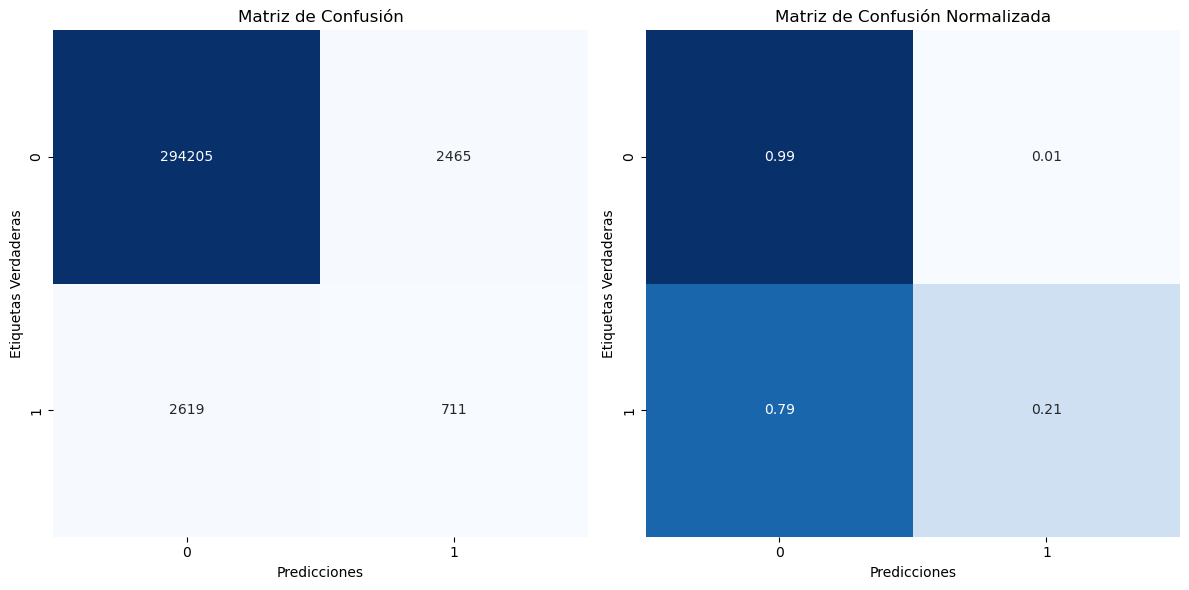

In [9]:
# Obtener la matriz de confusión en el conjunto de validación
test_conf_matrix_lgbm = confusion_matrix(y_test, predictions_lgbm)
test_conf_matrix_normalized_lgbm = test_conf_matrix_lgbm.astype('float') / test_conf_matrix_lgbm.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión en el conjunto de validación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(test_conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

# Visualizar la matriz de confusión normalizada en el conjunto de validación
plt.subplot(1, 2, 2)
sns.heatmap(test_conf_matrix_normalized_lgbm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

plt.tight_layout()
plt.show()

## XGBOOST

In [10]:
# Definir el modelo LightGBM y sus posibles hiperparámetros
xgb_model = xgb.XGBClassifier()
param_grid_xgb ={
   'classifier__n_estimators': [50, 100, 200], # poner tantos como se quiera probar
    'classifier__max_features': ['auto'], #['auto', 'sqrt', 'log2']
    'classifier__max_depth' : [4, 6, 8], # [4,5,6,7,8]
    'classifier__criterion' :['gini']} #['gini', 'entropy']

# Definir el espacio de búsqueda para RandomizedSearchCV
CV_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=10, random_state=12345, n_jobs=2)

# Realizar la búsqueda de hiperparámetros
CV_xgb.fit(X_train_u, y_train_u)

# Realizar las predicciones
predictions_xgb = CV_xgb.best_estimator_.predict(X_test)
pred_proba_xgb = CV_xgb.best_estimator_.predict_proba(X_test)  # Agregado para obtener las probabilidades

print("Classification Report XGBoost")
print(classification_report(y_test, predictions_xgb))

Classification Report XGBoost
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    296670
           1       0.13      0.28      0.18      3330

    accuracy                           0.97    300000
   macro avg       0.56      0.63      0.58    300000
weighted avg       0.98      0.97      0.98    300000



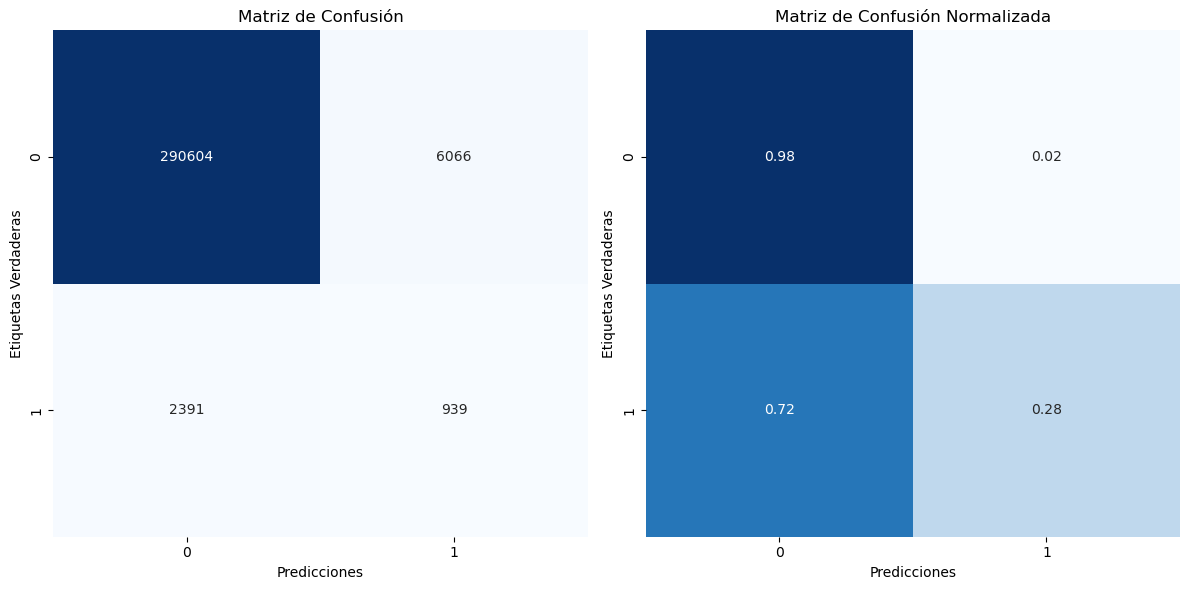

In [11]:
# Obtener la matriz de confusión en el conjunto de validación
val_conf_matrix_xgb = confusion_matrix(y_test, predictions_xgb)
val_conf_matrix_normalized_xgb = val_conf_matrix_xgb.astype('float') / val_conf_matrix_xgb.sum(axis=1)[:, np.newaxis]

# Visualizar la matriz de confusión en el conjunto de validación con seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(val_conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

# Visualizar la matriz de confusión normalizada en el conjunto de validación con seaborn
plt.subplot(1, 2, 2)
sns.heatmap(val_conf_matrix_normalized_xgb, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión Normalizada')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

plt.tight_layout()
plt.show()

- Resumen del código y conclusiones

Hemos decidido explorar los hiperparámetros de los dos modelos con mejor score para poder optimizar su rendimiento y así elegir uno de estos para continuar con el proyecto. 
En ambos aplicamos unos hiperparámetros ajustados a cada modelo y además usamos RandomSearchCV que nos ayuda a explorar aleatoriamente un subconjunto de combinaciones de hiperparámetros, acelerando el proceso de optimización. Además, el RandomSearch nos permite hacer una validación cruzada que divide los datos en varios subconjuntos ,en nuestro caso hemos hecho 10 (cv= 10), y realiza múltiples entrenamientos y evaluaciones. Por último entrenamos los modelos con nuestro conjunto train balanceado y comprobamos las predicciones con el test.

Como resultados de ambos modelos obtenemos con los datos del test, diferentes reports de classification y matrices de confusión. 
1. En el modelo de LGBM nos indica que la precisión para la clase 0 es muy buena, casi perfecta y un recall y f1 también excelentes, pero en cuanto a la precisión de la clase 1 no obtenemos tan buenos resultados y esto nos sugiere que al modelo le cuesta identificar correctamente la clase minoritaria. Además, si nos fijamos en la matriz de confusión normalizada se confirma que la precisión para la clase mayoritaria es muy buena pero en cuanto a la minoritaria tiene un nivel alto de falsos positivos, esto también nos lo indica el recall al ser muy bajo.
2. El modelo XGBoost nos muestra un menor f1-score, lo que significa que se ve reducido el equilibrio entre recall y precisión en comparación con el modelo anterior. En cambio observamos que el recall es mayor, esto demuestra que habrá una menor cantidad de falsos negativos pero una menor precisión. En cuanto a su matriz de confusión normalizada confirmamos esos niveles más altos de recall ya que observamos que hay un menor porcentaje de no fraude cuando realmente es fraude, algo que sería muy costoso para cualquier empresa.

## Curva ROC

Best Threshold for LightGBM = 0.050, G-Mean = 0.810
Best Threshold for XGBoost = 0.052, G-Mean = 0.784


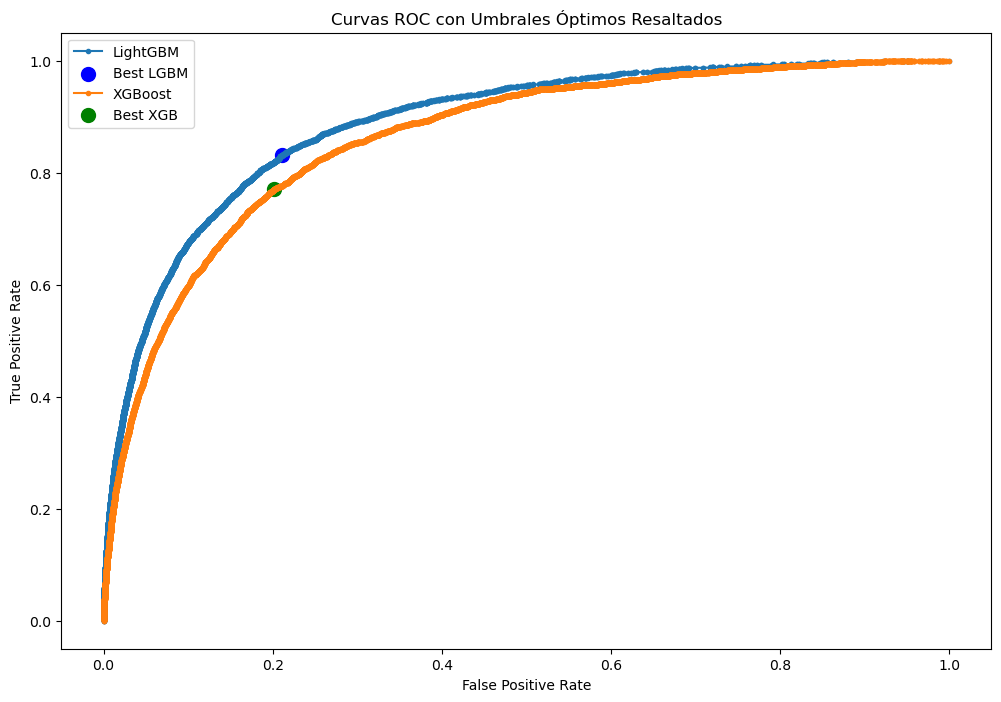

In [12]:
# Obtener las predicciones para LightGBM y XGBoost en el conjunto de prueba
yhat_lgbm = (pred_proba_lgbm)[:, 1]
yhat_xgb = (pred_proba_xgb)[:, 1]

# Calcular las curvas ROC para LightGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, yhat_lgbm)

# Calcular el índice G-mean para cada umbral para LightGBM
gmeans_lgbm = np.sqrt(tpr_lgbm * (1 - fpr_lgbm))
ix_lgbm = np.argmax(gmeans_lgbm)
best_threshold_lgbm = thresholds_lgbm[ix_lgbm]

# Calcular las curvas ROC para XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, yhat_xgb)

# Calcular el índice G-mean para cada umbral para XGBoost
gmeans_xgb = np.sqrt(tpr_xgb * (1 - fpr_xgb))
ix_xgb = np.argmax(gmeans_xgb)
best_threshold_xgb = thresholds_xgb[ix_xgb]

# Imprimir los mejores umbrales y los G-means correspondientes
print('Best Threshold for LightGBM = %.3f, G-Mean = %.3f' % (best_threshold_lgbm, gmeans_lgbm[ix_lgbm]))
print('Best Threshold for XGBoost = %.3f, G-Mean = %.3f' % (best_threshold_xgb, gmeans_xgb[ix_xgb]))

# Plotear curvas ROC para LightGBM y XGBoost con umbrales óptimos resaltados
plt.figure(figsize=(12, 8))

# LightGBM
plt.plot(fpr_lgbm, tpr_lgbm, marker='.', label='LightGBM')
plt.scatter(fpr_lgbm[ix_lgbm], tpr_lgbm[ix_lgbm], s=100, marker='o', color='blue', label='Best LGBM')

# XGBoost
plt.plot(fpr_xgb, tpr_xgb, marker='.', label='XGBoost')
plt.scatter(fpr_xgb[ix_xgb], tpr_xgb[ix_xgb], s=100, marker='o', color='green', label='Best XGB')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC con Umbrales Óptimos Resaltados')
plt.legend()
plt.show()


## Curva Lift

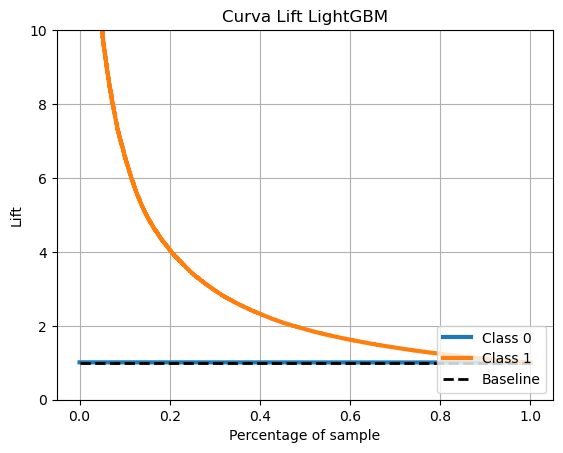

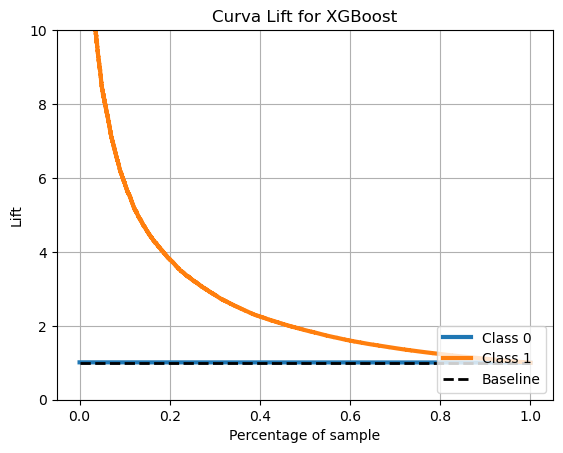

In [13]:
#LightGBM
skplt.metrics.plot_lift_curve(y_test, pred_proba_lgbm)
plt.title('Curva Lift LightGBM')
plt.gca().set_ylim(bottom=0, top=10)
plt.show()

#XGBoost 
skplt.metrics.plot_lift_curve(y_test, pred_proba_xgb)
plt.title('Curva Lift for XGBoost')
plt.gca().set_ylim(bottom=0, top=10)
plt.show()

## Curva de Ganancia

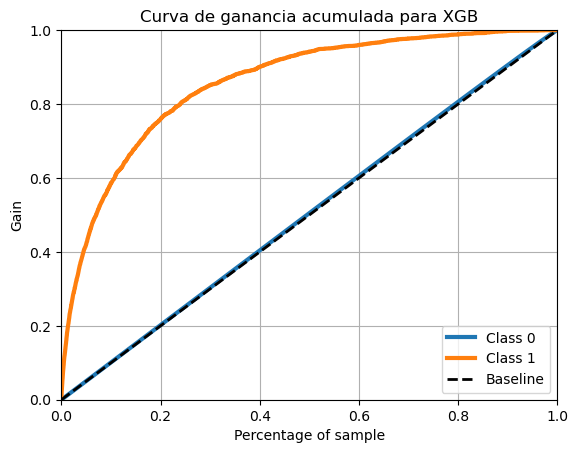

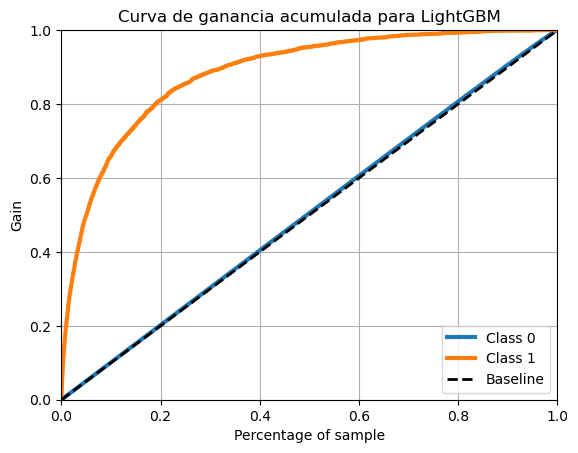

In [14]:
#XGBoost
skplt.metrics.plot_cumulative_gain(y_test, pred_proba_xgb)
plt.title('Curva de ganancia acumulada para XGB')
plt.show()

#LightGBM 
skplt.metrics.plot_cumulative_gain(y_test, pred_proba_lgbm)
plt.title('Curva de ganancia acumulada para LightGBM')
plt.show()

- Resumen del código y conclusiones

Además del classification report y las matrices de confusión hemos decidio representar los modelos y las curvas ROC, Lift y de ganancia. 
1. La primera curva que representamos es la curva ROC y los umbrales óptimos de cada modelo. Esta nos muestra el recall frente a la tasa de falsos positivos, y es por eso que podemos identificar que el modelo LightGBM es ligeramente superior al XGBoost debido a que, el primero, muestra un mayor balance entre los falsos y verdaderos positivos.
2. Las curvas Lift de cada modelo son muy parecidas y es que ambas curvas nos muestran la proporción entre la recuperación de casos positivos (fraude) utilizando los deciles ordenados por puntuación del modelo, en contraste con el azar. Se observa que para el primer 20% de los datos de la muestra, el modelo es aproximadamente 4 veces más eficaz que el azar en la clasificación de los casos de fraude.
3. Por último la curva de ganancia acumulada en la que, de nuevo, ambos modelos representan una curva muy parecida y en la que obtenemos como conclusión que la curva muestra la parte acumulada de casos de fraude que se recuperan a medida que se incorporan los deciles de mayor puntuación de la muestra. Se observa que para el primer 20%, se recupera el 80% del fraude de la muestra.

### Umbrales para LightGBM


Classification Report with Custom Threshold (0.2):
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    296670
           1       0.10      0.52      0.17      3330

    accuracy                           0.95    300000
   macro avg       0.55      0.74      0.57    300000
weighted avg       0.98      0.95      0.96    300000



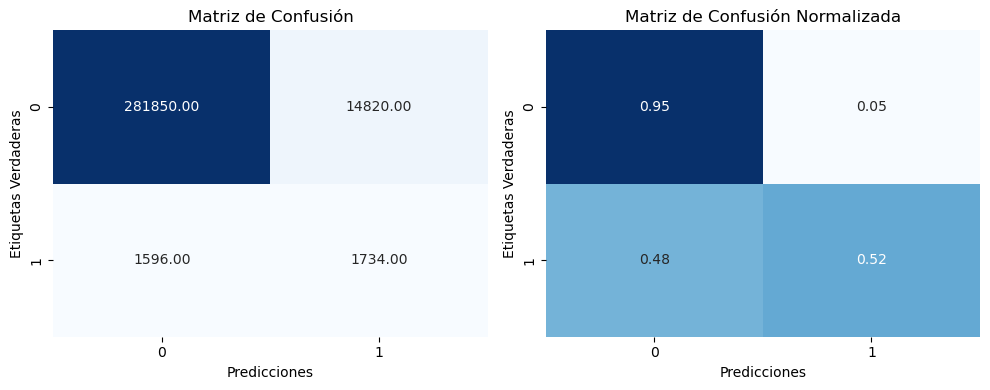


Classification Report with Custom Threshold (0.4):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    296670
           1       0.18      0.30      0.22      3330

    accuracy                           0.98    300000
   macro avg       0.59      0.64      0.61    300000
weighted avg       0.98      0.98      0.98    300000



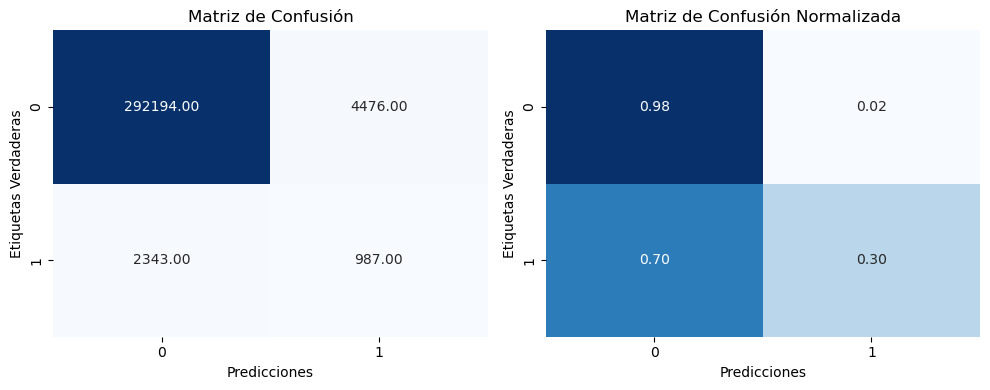


Classification Report with Custom Threshold (0.5):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    296670
           1       0.22      0.21      0.22      3330

    accuracy                           0.98    300000
   macro avg       0.61      0.60      0.61    300000
weighted avg       0.98      0.98      0.98    300000



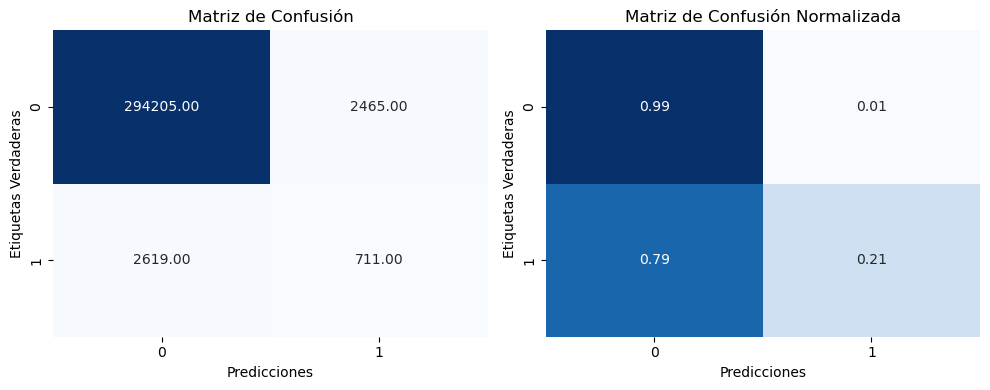


Classification Report with Custom Threshold (0.6):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    296670
           1       0.28      0.15      0.19      3330

    accuracy                           0.99    300000
   macro avg       0.63      0.57      0.59    300000
weighted avg       0.98      0.99      0.98    300000



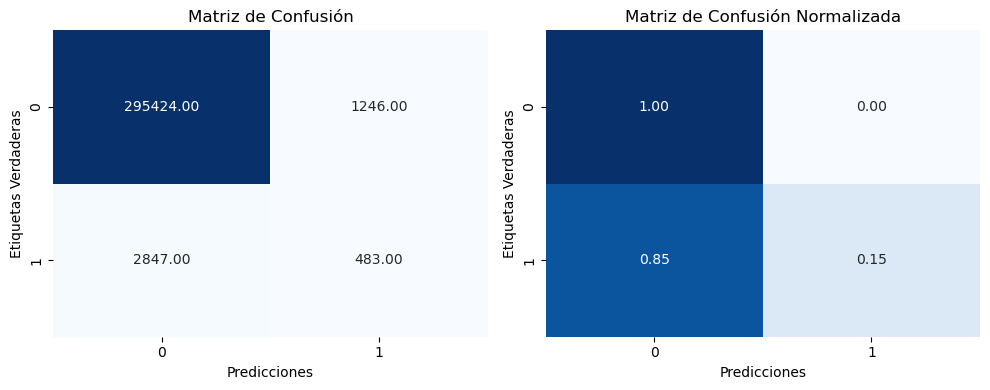

In [15]:
# Ajustar umbrales y calcular métricas
for threshold in [0.2, 0.4, 0.5, 0.6]:
    # Convertir las probabilidades en predicciones binarias usando el umbral
    predictions_custom_threshold_lgbm_test = (pred_proba_lgbm[:, 1] >= threshold).astype(int)

    # Imprimir el informe de clasificación con el umbral personalizado
    print(f"\nClassification Report with Custom Threshold ({threshold}):")
    print(classification_report(y_test, predictions_custom_threshold_lgbm_test))

    # Calcular y visualizar la matriz de confusión y la matriz de confusión normalizada
    conf_matrix_lgbm_umbral = confusion_matrix(y_test, predictions_custom_threshold_lgbm_test)
    conf_matrix_normalized_lgbm_umbral = conf_matrix_lgbm_umbral.astype('float') / conf_matrix_lgbm_umbral.sum(axis=1)[:, np.newaxis]

    # Visualizar la matriz de confusión y la matriz de confusión normalizada
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix_lgbm_umbral, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')

    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_normalized_lgbm_umbral, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusión Normalizada')
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Verdaderas')

    plt.tight_layout()
    plt.show()


## Guardamos el modelo

In [16]:
pickle.dump(modelo_lgbm, open('./modelo/lgb_modelo.pkl', 'wb'))

- Resumen del código y conclusiones

Los últimos pasos que realizamos son el ajuste de hiperparámetros para el modelo LightGBM y el guardado del modelo. 
Decidimos crear un bucle con los posibles umbrales desde el 0.2 al 0.6 y sus debidas Classification Reports junto con sus matrices de confusión. 
Podemos observar que cuanto menor es el umbral, ese equilibrio entre los verdaderos positivos y verdaderos negativos, mayor es nuestro recall y menor será nuestra precisión. Y esto se debe a que, como antes mencionado, la precisión representa las proporciones de instancias que realmente son fraude, mientras que el recall nos muestra cuantas de esas instancias positivas son realmente positivas. Basicamente, reducir el umbral significa que el modelo será más propenso a clasificar las instancias como positivas, lo que aumenta la probabilidad de capturar más casos de fraude (aumento de recall), pero también aumenta la probabilidad de clasificar incorrectamente algunas instancias de no fraude (disminución de precisión), en cambio si el umbral aumenta,  el modelo se volverá más conservador al clasificar instancias como positivas. Esto puede resultar en una disminución del recall, ya que el modelo será menos propenso a identificar todos los casos de fraude. Sin embargo, al mismo tiempo, puede aumentar la precisión, ya que el modelo será más cauteloso al etiquetar instancias como positivas, reduciendo así la probabilidad de clasificar incorrectamente instanciao fraudulentas. 

En nuestro caso es mucho más costoso un falso positivo que un falso negativo, ya que decir que no es fraude cuando realmente si lo es puede tener consecuencias financieras significativas. Por lo tanto, nos inclinamos hacia minimizar los falsos positivos, incluso a expensas de un posible aumento en los falsos negativos. Al ajustar el umbral hacia valores más altos, buscamos mejorar la precisión a costa de una ligera disminución en el recall y por lo tanto un equilibrio entre ambos y un mejor f1-score. El umbral con el cual obtenemos mejores resultados es el de 0.5, que resulta obtener los mismos resultados que cuando hacemos la predicción con el best_estimator. 

Por último, guardamos el modelo para continuar con la explicabilidad en el siguiente código. 